### Nitish Dhinaharan
**Course:** MSCS 634 – Data Mining  
**Lab 2:** Classification Using KNN and RNN Algorithms


In [6]:
# imports
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [7]:
# Step 1: Load and Prepare the Dataset

# 1) load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# 2) quick exploration
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

print("Feature names:", wine.feature_names)
print("Target names:", wine.target_names)
print("\nClass distribution:")
print(df['target'].value_counts())

# 3) split dataset into train-test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']

Class distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


In [8]:
# Step 2: Implement K-Nearest Neighbors (KNN)

k_values = [1, 5, 11, 15, 21]
knn_results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_results[k] = acc

knn_results


{1: 0.7777777777777778,
 5: 0.8055555555555556,
 11: 0.8055555555555556,
 15: 0.8055555555555556,
 21: 0.8055555555555556}

In [9]:
# Step 3: Implement Radius Neighbors (RNN) with scaling

# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

radius_values = [350, 400, 450, 500, 550, 600]
rnn_results = {}

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label=None)
    rnn.fit(X_train_scaled, y_train)
    y_pred = rnn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    rnn_results[r] = acc

rnn_results


{350: 0.3888888888888889,
 400: 0.3888888888888889,
 450: 0.3888888888888889,
 500: 0.3888888888888889,
 550: 0.3888888888888889,
 600: 0.3888888888888889}

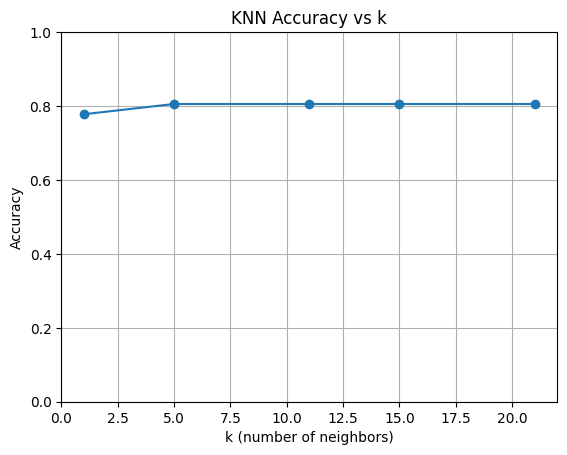

In [11]:
# Step 4: Visualize and Compare Results

# KNN plot
plt.figure()
plt.plot(list(knn_results.keys()), list(knn_results.values()), marker='o')
plt.title("KNN Accuracy vs k")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

KNN plot results show that very small k (k=1) can perform well on this dataset, but increasing k may slightly stabilize or reduce accuracy depending on the data.

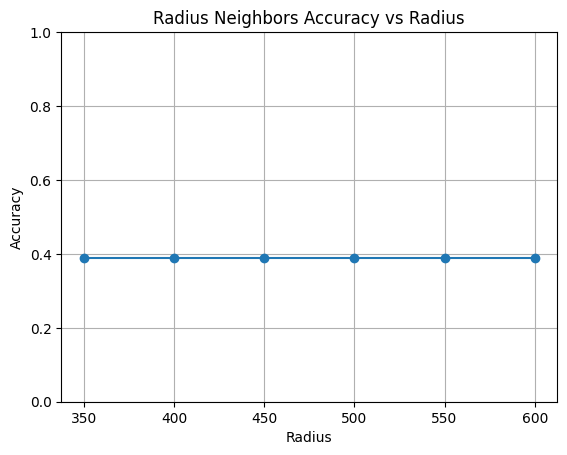

In [12]:
# RNN plot
plt.figure()
plt.plot(list(rnn_results.keys()), list(rnn_results.values()), marker='o')
plt.title("Radius Neighbors Accuracy vs Radius")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

RNN performance depends heavily on the chosen radius and on feature scaling. Very large radii tend to include many neighbors, which can flatten performance.